In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

Load Dataset

In [15]:
data = pd.read_csv("Titanic-Dataset.csv")
print(" Dataset Loaded Successfully!\n")

print(" Preview of Data:")
print(data.head())

print("\n Dataset Info:")
print(data.info())

print("\n Missing Values:")
print(data.isnull().sum())

 Dataset Loaded Successfully!

 Preview of Data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4     

Data Visualization

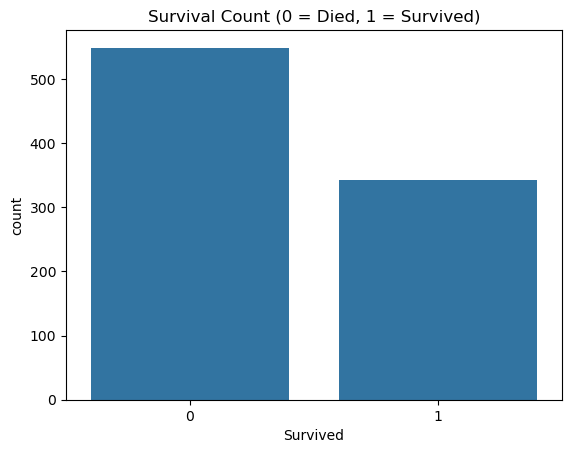

In [16]:
sns.countplot(x='Survived', data=data)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

Handle Missing Values

In [17]:
data['Age'] = data['Age'].fillna(data['Age'].median())

if 'Embarked' in data.columns:
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

for col in ['Cabin', 'Ticket', 'Name']:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

print("\n Cleaned data and handled missing values successfully!")


 Cleaned data and handled missing values successfully!


In [18]:
le = LabelEncoder()

for col in ['Sex', 'Embarked']:
    if col in data.columns:
        data[col] = le.fit_transform(data[col])

print("\n Encoded Categorical Features:")
print(data.head())


 Encoded Categorical Features:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


Split Data into Features & Target


In [20]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
print(f"\n Training Samples: {len(X_train)} | Testing Samples: {len(X_test)}")



 Training Samples: 712 | Testing Samples: 179


Model Training

In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\n Model Training Complete!")


 Model Training Complete!


Model Evaluation

y_pred = model.predict(X_test)

In [26]:
print("\n Model Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


 Model Performance:
Accuracy: 0.827

Confusion Matrix:
 [[93 12]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



Feature Importance Visualization

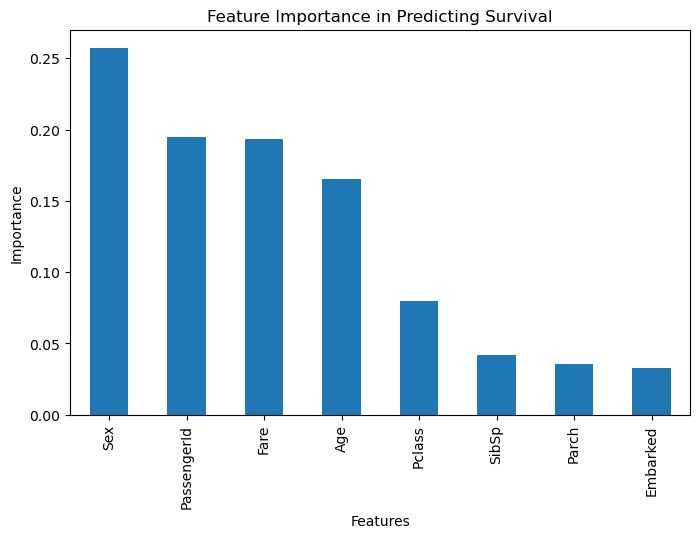

In [29]:
plt.figure(figsize=(8, 5))
pd.Series(model.feature_importances_, index=X.columns)\
  .sort_values(ascending=False)\
  .plot(kind='bar') 
plt.title("Feature Importance in Predicting Survival")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

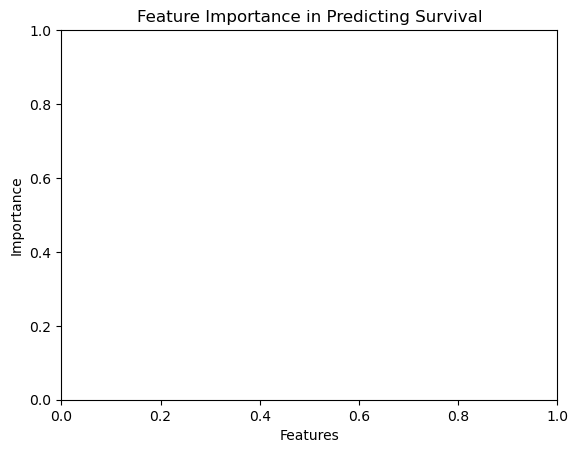